In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

## Data Preprocessing
### read data

In [2]:
df = pd.read_csv("sell.csv", encoding = 'big5')
df.head()

,銷售量,國家,作者年齡,種類
0,熱銷,美國,40,奇幻
1,普通,台灣,35,言情
2,熱銷,中國,52,武俠
3,普通,日本,29,恐怖靈異
4,普通,台灣,25,科幻


### Deal with the remainging string data: 銷售量、國家、種類

In [3]:
sellv_map = {'滯銷':0, '普通':1, '熱銷':2 }
country_map = {'台灣':0, '日本':1, '美國':2, '英國':3, '中國':4 }
cate_map = {'奇幻':0, '科幻':1, '言情':2, '武俠':3, '恐怖靈異':4, '輕小說':5, '散文':6, '詩詞選集':7 }

df['銷售量'] = df['銷售量'].map(sellv_map)
df['國家'] = df['國家'].map(country_map)
df['種類'] = df['種類'].map(cate_map)

df.head()

,銷售量,國家,作者年齡,種類
0,2,2,40,0
1,1,0,35,2
2,2,4,52,3
3,1,1,29,4
4,1,0,25,1


### Seperate data into training set and testing(validation) set

In [4]:
df_train = df[:170]
df_train.head()

,銷售量,國家,作者年齡,種類
0,2,2,40,0
1,1,0,35,2
2,2,4,52,3
3,1,1,29,4
4,1,0,25,1


In [5]:
df_test = df[170:]
df_test.head()

,銷售量,國家,作者年齡,種類
170,1,4,36,2
171,2,1,27,5
172,2,1,26,5
173,2,1,27,5
174,2,1,44,5


### Seperate attributes and answer

In [6]:
sv_t = df_train['銷售量'].values
df_train = df_train.drop('銷售量', axis=1 )
sv_t

array([2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 0,
       0, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 0, 2, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 1, 2, 2, 1])

## Build Decision Tree

In [7]:
dtree = DecisionTreeClassifier(max_depth=4)
dtree.fit(df_train, sv_t)

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, filled=True, feature_names=list(df_train), class_names=['滯銷','普通','熱銷'],
special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("tree.pdf")

True

In [8]:
dtree.feature_importances_


array([0.35112043, 0.52237971, 0.12649986])

## The Decision Tree

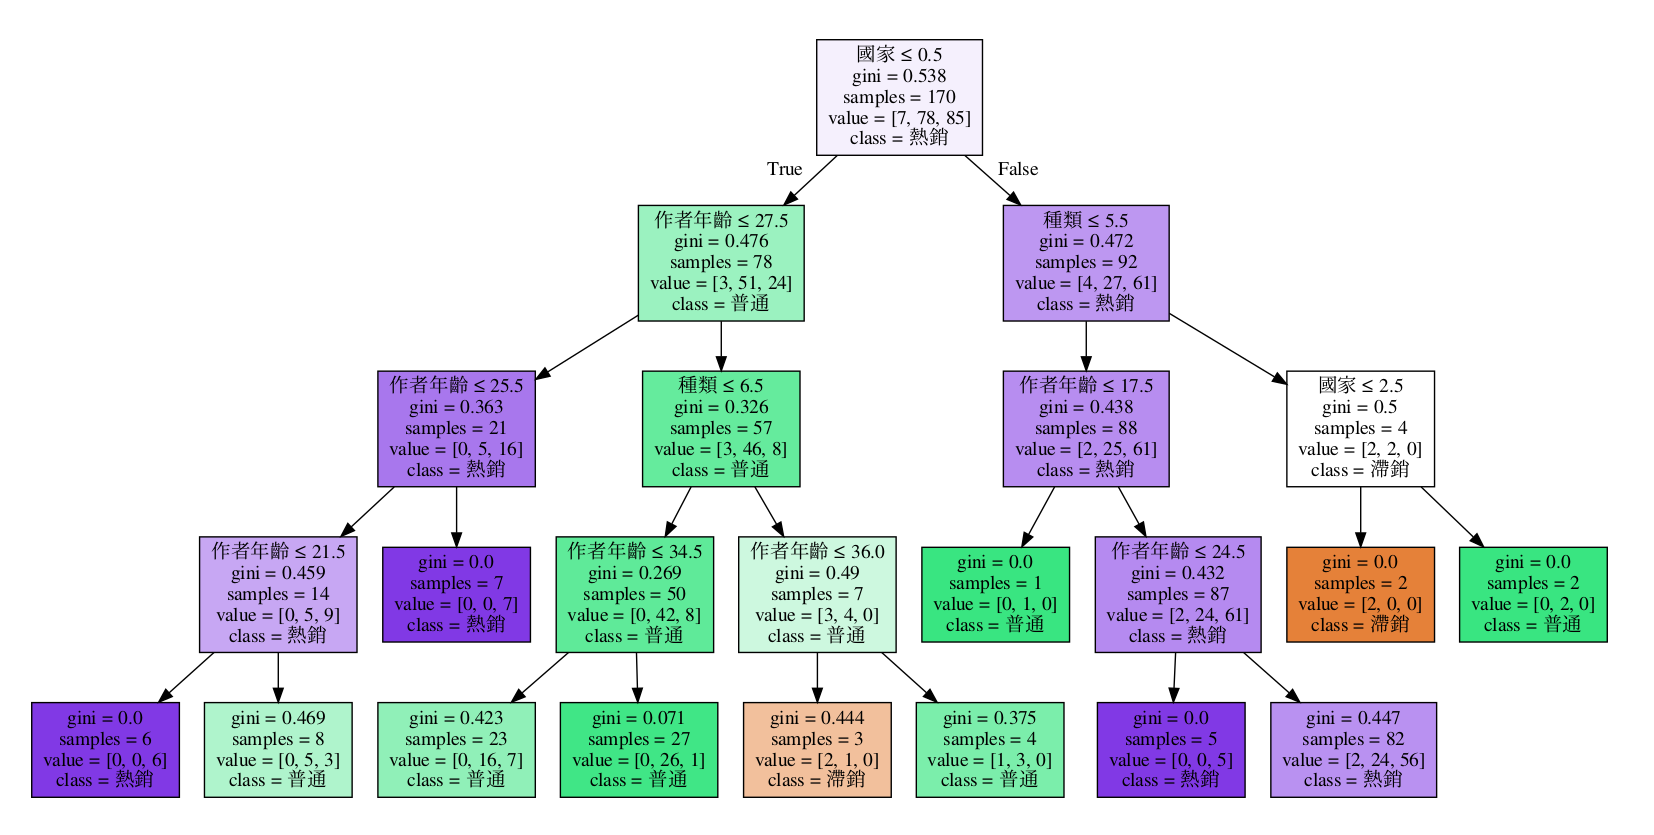

### Apply to testing data and then calculate accuracy.

In [9]:
sv_test = df_test['銷售量'].values
df_test = df_test.drop('銷售量', 1)

sv_predict = dtree.predict(df_test)

sv_predict

array([2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 0, 2, 2, 2,
       2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
from sklearn.metrics import accuracy_score

accuracy_score(sv_test, sv_predict)

0.6842105263157895